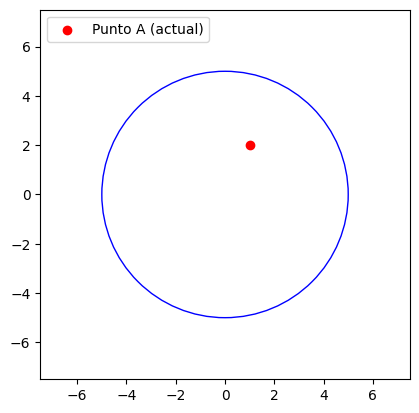

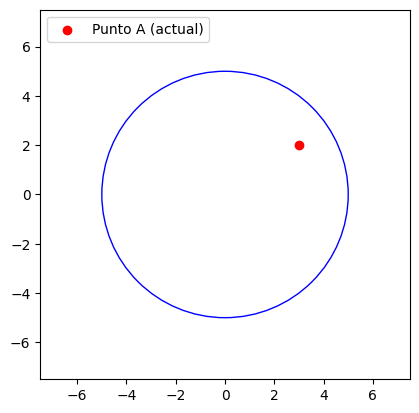

Simulando desplazamiento a 1 en direccion arriba.


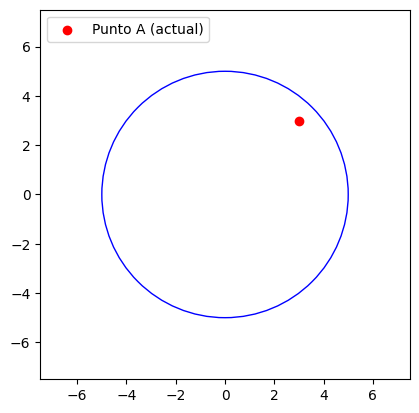

Norma del vector: 4.242640687119285
Producto interno entre [3 3] y [3 4]: 21


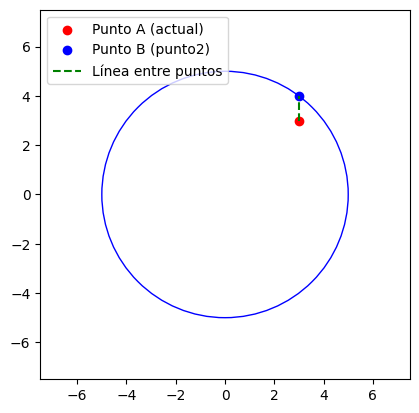

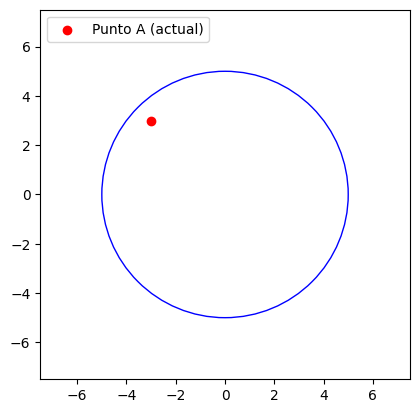

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class Escena:
    def __init__(self, radio_circunferencia, color_circunferencia, posicion_punto):
        self.radio_circunferencia = radio_circunferencia
        self.color_circunferencia = color_circunferencia
        self.posicion_punto = np.array(posicion_punto)

    def crear_escena(self):
        pass

    def cambiar_escena(self, radio_circunferencia=None, color_circunferencia=None, posicion_punto=None):
        if radio_circunferencia:
            self.radio_circunferencia = radio_circunferencia
        if color_circunferencia:
            self.color_circunferencia = color_circunferencia
        if posicion_punto:
            self.posicion_punto = np.array(posicion_punto)

    def dibujar_escena(self, punto2=None):
        circulo = plt.Circle((0, 0), self.radio_circunferencia, color=self.color_circunferencia, fill=False)
        fig, ax = plt.subplots()
        ax.add_patch(circulo)

        ax.scatter(self.posicion_punto[0], self.posicion_punto[1], color='red', label="Punto A (actual)")

        if punto2 is not None:
            ax.scatter(punto2[0], punto2[1], color='blue', label="Punto B (punto2)")
            ax.plot([self.posicion_punto[0], punto2[0]], [self.posicion_punto[1], punto2[1]], color='green', linestyle='--', label="Línea entre puntos")

        ax.set_xlim([-self.radio_circunferencia * 1.5, self.radio_circunferencia * 1.5])
        ax.set_ylim([-self.radio_circunferencia * 1.5, self.radio_circunferencia * 1.5])
        ax.set_aspect('equal')
        ax.legend(loc='upper left')
        plt.show()

    def desplazar_puntos(self, valor_desplazamiento, direccion):
        if direccion == 'derecha':
            self.posicion_punto += np.array([valor_desplazamiento, 0])
        elif direccion == 'izquierda':
            self.posicion_punto -= np.array([valor_desplazamiento, 0])
        elif direccion == 'arriba':
            self.posicion_punto += np.array([0, valor_desplazamiento])
        elif direccion == 'abajo':
            self.posicion_punto -= np.array([0, valor_desplazamiento])

    def simular(self, velocidad, direccion):
        print(f"Simulando desplazamiento a {velocidad} en direccion {direccion}.")
        self.desplazar_puntos(velocidad, direccion)
        self.dibujar_escena()

    def norma(self):
        return np.linalg.norm(self.posicion_punto)

    def producto_interno(self, punto2):
        producto = np.dot(self.posicion_punto, punto2)
        print(f"Producto interno entre {self.posicion_punto} y {punto2}: {producto}")
        self.dibujar_escena(punto2)
        return producto

    def rotar(self, angulo):
        angulo_rad = np.radians(angulo)
        matriz_rotacion = np.array([
            [np.cos(angulo_rad), -np.sin(angulo_rad)],
            [np.sin(angulo_rad), np.cos(angulo_rad)]
        ])
        self.posicion_punto = np.dot(matriz_rotacion, self.posicion_punto)
        self.dibujar_escena()


escena = Escena(radio_circunferencia=5, color_circunferencia='blue', posicion_punto=[1, 2])
escena.dibujar_escena()

escena.desplazar_puntos(2, "derecha")
escena.dibujar_escena()

escena.simular(1, "arriba")

norma = escena.norma()
print(f"Norma del vector: {norma}")

punto2 = np.array([3, 4])
producto_interno = escena.producto_interno(punto2)

escena.rotar(90)
